<a href="https://colab.research.google.com/github/nguyendoanquangnhat/KERAS/blob/main/KERAS_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)
[49]


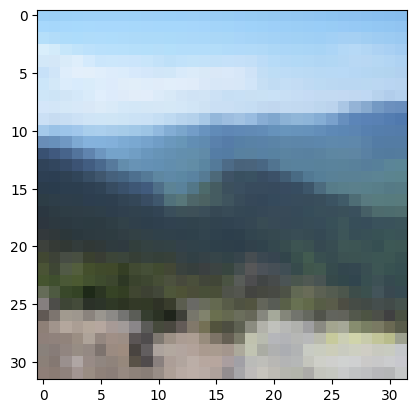

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

digit=x_train[12345]
plt.imshow(digit)
print(y_train[12345])

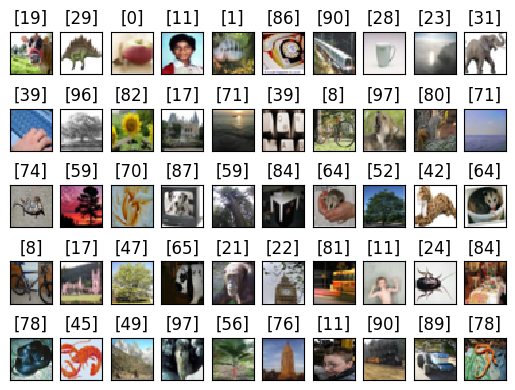

In [ ]:
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train=x_train.reshape((50000,32*32*3))
x_train=x_train.astype('float32')/255
x_test=x_test.reshape((10000,32*32*3))
x_test=x_test.astype('float32')/255

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (50000, 3072)
x_test: (10000, 3072)


In [ ]:
from keras.models import Sequential     
from keras.layers import Dense          

model=Sequential()
model.add(Dense(2560,activation='relu',input_shape=(32*32*3,)))
#model.add(Dense(1280,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2560)              7866880   
                                                                 
 dense_28 (Dense)            (None, 100)               256100    
                                                                 
Total params: 8,122,980
Trainable params: 8,122,980
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
y_train: (50000, 100)
x_test: (10000, 3072)
y_test: (10000, 100)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  
model.fit(x_train,y_train,epochs=20,batch_size=32)  
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss:',test_loss)
print('Accuracy:',test_acc)

Epoch 1/20
1563/1563 [==============================] - 161s 103ms/step - loss: 4.0658 - accuracy: 0.0875
Epoch 2/20
1563/1563 [==============================] - 156s 100ms/step - loss: 3.6913 - accuracy: 0.1385
Epoch 3/20
1563/1563 [==============================] - 155s 99ms/step - loss: 3.5817 - accuracy: 0.1600
Epoch 4/20
1563/1563 [==============================] - 156s 100ms/step - loss: 3.5193 - accuracy: 0.1730
Epoch 5/20
1563/1563 [==============================] - 151s 97ms/step - loss: 3.4671 - accuracy: 0.1817
Epoch 6/20
1563/1563 [==============================] - 149s 96ms/step - loss: 3.4277 - accuracy: 0.1860
Epoch 7/20
1563/1563 [==============================] - 149s 95ms/step - loss: 3.3906 - accuracy: 0.1953
Epoch 8/20
1563/1563 [==============================] - 149s 96ms/step - loss: 3.3606 - accuracy: 0.1986
Epoch 9/20
1563/1563 [==============================] - 150s 96ms/step - loss: 3.3364 - accuracy: 0.2048
Epoch 10/20
1563/1563 [=============================